In [1]:
# mouse volcano

In [2]:
import sys
import os
from itertools import chain
from collections import defaultdict
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('precision', 3)
import gseapy as gp
import goatools
import numpy as np
import seaborn as sns
from adjustText import adjust_text

sns.set_style('whitegrid')
obodag = goatools.obo_parser.GODag('go-basic.obo')
sys.path.insert(0, "/home/gstupp/projects/metaproteomics")
from metaproteomics import utils
#from metaproteomics.analysis import build_loci

BASE = '../out/'

load obo file go-basic.obo
go-basic.obo: fmt(1.2) rel(2017-03-16) 48,478 GO Terms


In [13]:
def plot(df_sig, df_insig):
    fig = plt.figure(figsize=(15, 9))
    fig.set_tight_layout(False)
    ax = fig.add_subplot(111)

    # Plot the INsig points
    X = df_insig['log2FoldChange'].values
    Y = df_insig['-logp'].values
    ax.scatter(X, Y, color='silver', s=20)

    # Plot the sig points
    X = df_sig['log2FoldChange'].values
    Y = df_sig['-logp'].values
    ax.scatter(X, Y, color='black', s=20)

    texts = []
    X = df_sig['log2FoldChange'].values
    Y = df_sig['-logp'].values
    for name, x, y in zip(df['gn'], X, Y):
        if abs(x) >= 1.5 and y >= 5 and name != '' and isinstance(name, str) and len(name)<10:
            texts.append(plt.text(x, y, name, size = 12, weight='extra bold'))

    ax.xaxis.set_label_text("Log(2) Fold Change")
    ax.yaxis.set_label_text("-logp")
    ax.set_xlim(-10.5,10.5)
    ax.set_ylim(0,50)
    ax.legend(loc=2, fontsize='x-large')
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


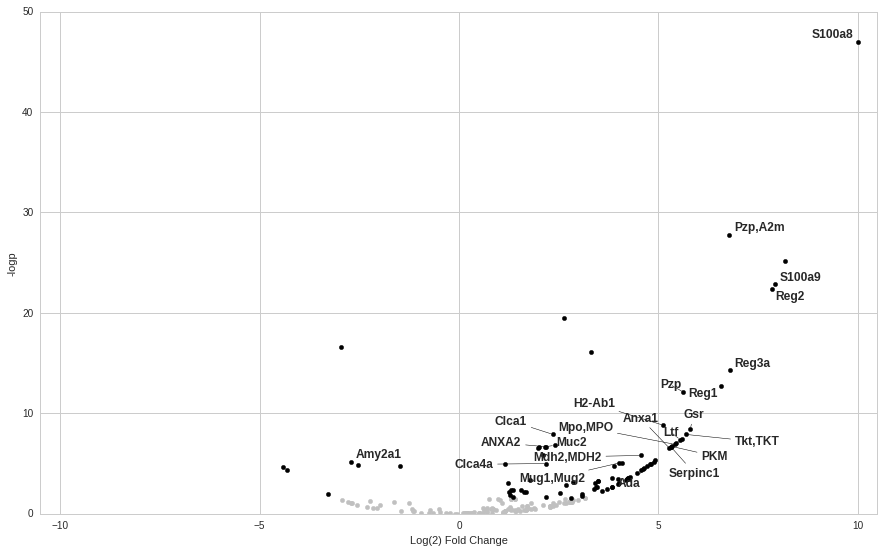

In [14]:
df = pd.read_csv(os.path.join(BASE,"RT_control_results_named_annot.csv"), index_col=0)
df = df[df.human_mouse]
df['-logp'] = -1*np.log(df.padj)
df_sig = df[(df.padj<=0.2) & (abs(df.log2FoldChange) >= 1)]
df_insig = df[~((df.padj<=0.2) & (abs(df.log2FoldChange) >= 1))]
plot(df_sig, df_insig)

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


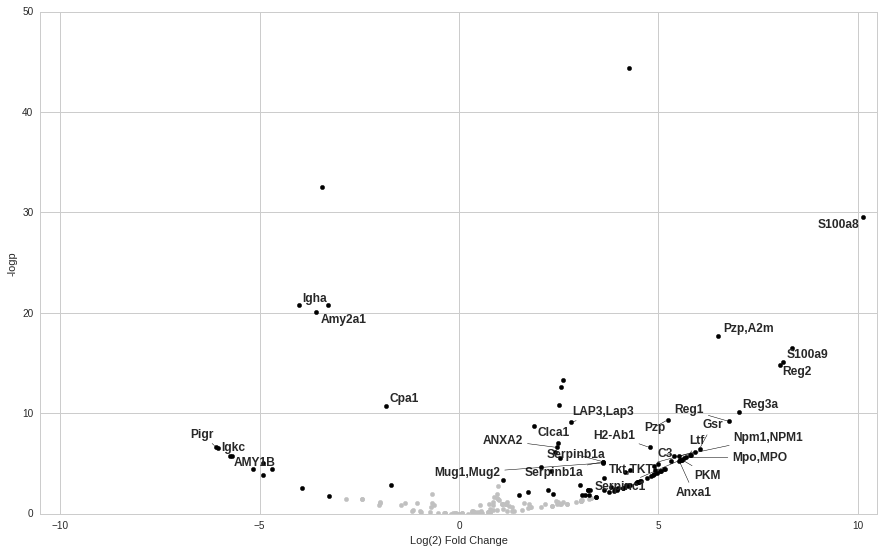

In [15]:
df = pd.read_csv(os.path.join(BASE,"RT_WT_results_named_annot.csv"), index_col=0)
df = df[df.human_mouse]
df['-logp'] = -1*np.log(df.padj)
df_sig = df[(df.padj<=0.2) & (abs(df.log2FoldChange) >= 1)]
df_insig = df[~((df.padj<=0.2) & (abs(df.log2FoldChange) >= 1))]
plot(df_sig, df_insig)

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


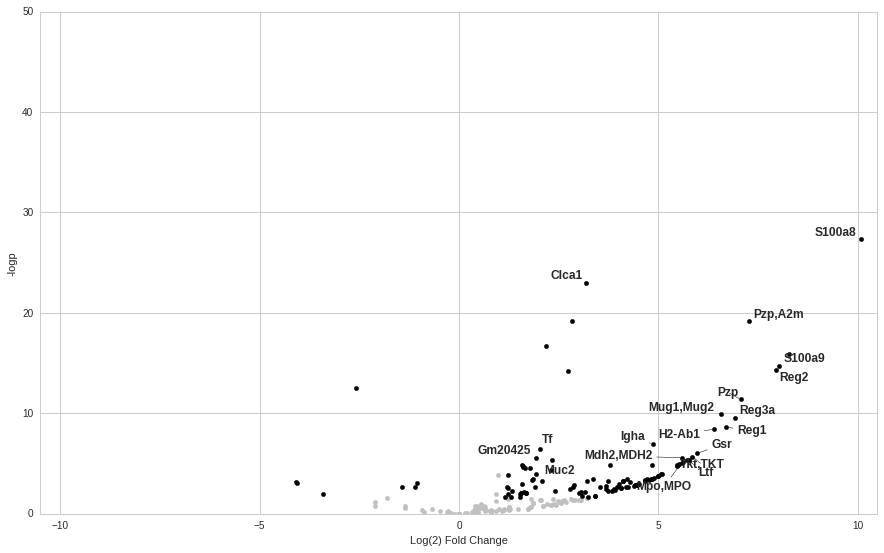

In [18]:
df = pd.read_csv(os.path.join(BASE,"RT_Rag_results_named_annot.csv"), index_col=0)
df = df[df.human_mouse]
df['-logp'] = -1*np.log(df.padj)
df_sig = df[(df.padj<=0.2) & (abs(df.log2FoldChange) >= 1)]
df_insig = df[~((df.padj<=0.2) & (abs(df.log2FoldChange) >= 1))]
plot(df_sig, df_insig)

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


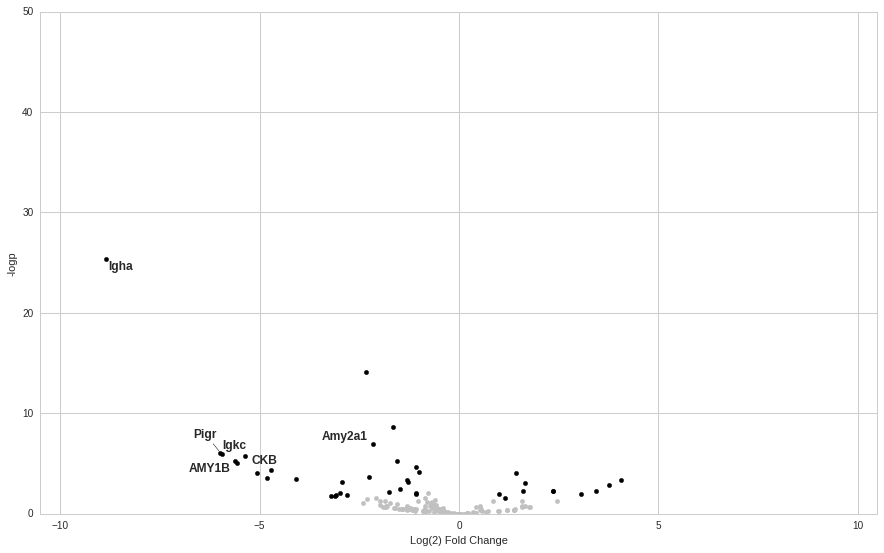

In [17]:
df = pd.read_csv(os.path.join(BASE,"Rag_WT_results_named_annot.csv"), index_col=0)
df = df[df.human_mouse]
df['-logp'] = -1*np.log(df.padj)
df_sig = df[(df.padj<=0.2) & (abs(df.log2FoldChange) >= 1)]
df_insig = df[~((df.padj<=0.2) & (abs(df.log2FoldChange) >= 1))]
plot(df_sig, df_insig)